<a href="https://colab.research.google.com/github/AdnanSakal/Text_Classification_/blob/main/text_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import zipfile
import os
import random

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 20.44 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.


In [ ]:
!ls pubmed-rct

PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [ ]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [ ]:
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign"
os.listdir(data_dir)

['test.txt', 'dev.txt', 'train.txt']

In [ ]:
all_path = [os.path.join(data_dir,i) for i in os.listdir(data_dir)]
sorted(all_path)

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

In [ ]:
train_path = all_path[2]
val_path = all_path[0]
test_path = all_path[1]

In [ ]:
with open(train_path,"r") as f: # should've made a function (^_^)
  train_text = f.readlines()

In [ ]:
with open(test_path,"r") as f:
  test_text = f.readlines()

In [ ]:
with open(val_path,"r") as f:
  val_text = f.readlines()

In [ ]:
len(train_text),len(val_text)

(35212, 35135)

In [ ]:
def preprocess(text):
  abstract_line = " "
  abstract_list = []
  for i in text:
    if i.startswith("###"):
      abstract_line = ""
    elif i.isspace():
      abstract_sample = abstract_line.splitlines()
      for j,k in enumerate(abstract_sample):
        dic = {
            "text":k.split("\t")[1].lower(),
            "target":k.split("\t")[0],
            "line_number":j,
            "total_line":len(abstract_sample)-1
        }
        abstract_list.append(dic)
    else:
      abstract_line = abstract_line + i
  return abstract_list

In [ ]:
train_data = preprocess(train_text)
test_data = preprocess(test_text)
val_data = preprocess(val_text)
test_data

[{'text': 'ige sensitization to aspergillus fumigatus and a positive sputum fungal culture result are common in patients with refractory asthma .',
  'target': 'BACKGROUND',
  'line_number': 0,
  'total_line': 9},
 {'text': 'it is not clear whether these patients would benefit from antifungal treatment .',
  'target': 'BACKGROUND',
  'line_number': 1,
  'total_line': 9},
 {'text': 'we sought to determine whether a @-month course of voriconazole improved asthma-related outcomes in patients with asthma who are ige sensitized to a fumigatus .',
  'target': 'OBJECTIVE',
  'line_number': 2,
  'total_line': 9},
 {'text': 'asthmatic patients who were ige sensitized to a fumigatus with a history of at least @ severe exacerbations in the previous @ months were treated for @ months with @ mg of voriconazole twice daily , followed by observation for @ months , in a double-blind , placebo-controlled , randomized design .',
  'target': 'METHODS',
  'line_number': 3,
  'total_line': 9},
 {'text': 'p

In [ ]:
train_dataframe = pd.DataFrame(train_data)
test_dataframe = pd.DataFrame(test_data)
val_dataframe = pd.DataFrame(val_data)
test_dataframe

,text,target,line_number,total_line
0,ige sensitization to aspergillus fumigatus and...,BACKGROUND,0,9
1,it is not clear whether these patients would b...,BACKGROUND,1,9
2,we sought to determine whether a @-month cours...,OBJECTIVE,2,9
3,asthmatic patients who were ige sensitized to ...,METHODS,3,9
4,primary outcomes were improvement in quality o...,METHODS,4,9
...,...,...,...,...
30207,pruritus occurred more frequently with the act...,RESULTS,9,13
30208,three patients in the active-regimen group ( @...,RESULTS,10,13
30209,hemoglobin values of grade @ ( @ to < @ g per ...,RESULTS,11,13
30210,rates of response to a @-week interferon-free ...,CONCLUSIONS,12,13


In [ ]:
train_text = train_dataframe["text"].to_numpy()
test_text = test_dataframe["text"].to_numpy()
val_text = val_dataframe["text"].to_numpy()

train_target = train_dataframe["target"].to_numpy()
test_target = test_dataframe["target"].to_numpy()
val_target = val_dataframe["target"].to_numpy()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_instance = OneHotEncoder(sparse=False)
train_one_hot_label = one_hot_instance.fit_transform(train_target.reshape([-1,1]))
val_one_hot_label = one_hot_instance.transform(val_target.reshape([-1,1]))
test_one_hot_label = one_hot_instance.transform(test_target.reshape([-1,1]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
train_one_hot_label

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_one_hot_instance = LabelEncoder()
train_normal_label = label_one_hot_instance.fit_transform(train_target)
test_normal_label = label_one_hot_instance.fit_transform(test_target)
val_normal_label = label_one_hot_instance.fit_transform(val_target)

In [ ]:
class_names = label_one_hot_instance.classes_
class_names == sorted(set(train_target))

array([ True,  True,  True,  True,  True])

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_text,train_one_hot_label)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
val_dataset = tf.data.Dataset.from_tensor_slices((val_text,val_one_hot_label)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
model_0 = Pipeline([
    ("tfidf",TfidfVectorizer()),
    ("clf",MultinomialNB())
])
model_0.fit(train_text,train_normal_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(val_text,val_normal_label)

0.6755931640949062

In [ ]:
y_pred_0 = model_0.predict(val_text)

In [ ]:
y_pred_0

array([2, 2, 2, ..., 4, 4, 4])

In [ ]:
len(train_text)

30135

(array([5.0770e+03, 1.2988e+04, 7.5110e+03, 2.8650e+03, 1.0440e+03,
        3.8000e+02, 1.7200e+02, 8.1000e+01, 4.5000e+01, 2.2000e+01,
        1.0000e+01, 8.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  1.  ,  13.85,  26.7 ,  39.55,  52.4 ,  65.25,  78.1 ,  90.95,
        103.8 , 116.65, 129.5 , 142.35, 155.2 , 168.05, 180.9 , 193.75,
        206.6 , 219.45, 232.3 , 245.15, 258.  ]),
 <BarContainer object of 20 artists>)

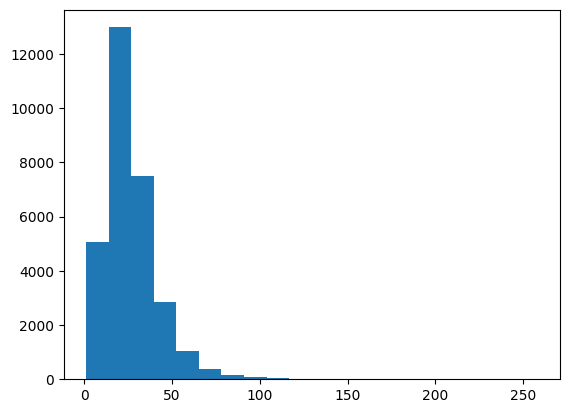

In [ ]:
len_of_word = [len(i.split()) for i in train_text]
plt.hist(len_of_word,bins=20)
# plt.grid(True,linestyle = "--",linewidth = 1)

In [ ]:
np.mean(len_of_word),np.percentile(len_of_word,95)

(26.42244803389382, 55.0)

In [ ]:
np.percentile(tf.range(10),95)

8.549999999999999

In [ ]:
from tensorflow.keras.layers import TextVectorization
text_vectorizer = TextVectorization(max_tokens = 68000,
                                    output_sequence_length = 55
                                    )

In [ ]:
text_vectorizer.adapt(train_text)

In [ ]:
rand = random.choice(train_text)
print(f"Text-\n{rand}\n")
print(f"Text_Vect:-\n{text_vectorizer([rand])}\n---------")

Text-
glutamine , cortisol , cytokines , glucose , heat shock protein-@ , and erythropoietin were measured in serum , and the cytokine production from lymphocytes was measured .

Text_Vect:-
[[2646 1326 3719  262 2740 1409  342    3 3325    9  177    5  244    3
     2 2759 2154   26 4678   10  177    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]
---------


In [ ]:
from tensorflow.keras.layers import Embedding
embed_layer = Embedding(input_dim = 68000,
                        output_dim = 128,
                        mask_zero = True
                        )

In [ ]:
rand = random.choice(train_text)
print(f"Text-\n{rand}\n")
print(f"Text_Vect:-\n{text_vectorizer([rand])}")
print(f"Embedding:-\n{embed_layer(text_vectorizer([rand]))}\n----------")
print(f"text_vect_shape:- {text_vectorizer([rand]).shape}\n")
print(f"embed_layer_shape:- {embed_layer(text_vectorizer([rand])).shape}\n")

Text-
ree and respiratory quotient ( rq ) were measured in eight healthy young men by ventilated-hood indirect calorimetry for @ min baseline and @ h following ingestion of @ ml of either : sfrb + placebo , water +@ mg caffeine , or water + placebo , according to a randomized cross-over design .

Text_Vect:-
[[ 2140     3   560 13487  9348     9   156     5   771   215   775   281
     22 16412  2614  8909    11   243    51     3   182   259  2220     4
    308     4   132  6432    49   861    84  1920    16   861    49   367
      6     8    29   539   348     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]
Embedding:-
[[[ 0.04893836  0.02480055  0.00299271 ... -0.00578092 -0.04761516
    0.0395048 ]
  [-0.02374116  0.006626    0.04407975 ...  0.03085187 -0.0148597
    0.0325808 ]
  [ 0.0443861   0.02459328 -0.02391056 ... -0.01459908  0.02685693
    0.02736386]
  ...
  [-0.00945897  0.03298593 -0.01983578 ...  0.02377143 -0.01730359
   -0.01805079]

In [ ]:
input = tf.keras.layers.Input(shape=[1,],dtype = "string")
x = text_vectorizer(input)
x = embed_layer(x)
x = tf.keras.layers.Conv1D(64,5,activation = "relu")(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
output = tf.keras.layers.Dense(5,activation = "softmax")(x)

model_1 = tf.keras.Model(input,output)
model_1.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
his_1 = model_1.fit(train_dataset,
                    epochs = 5,
                    steps_per_epoch = int(len(train_dataset)*0.2),
                    validation_data = val_dataset,
                    validation_steps = int(len(val_dataset)*0.2)
                    )

Epoch 1/5
189/189 [==============================] - 48s 236ms/step - loss: 1.1655 - accuracy: 0.5536 - val_loss: 0.8388 - val_accuracy: 0.6980
Epoch 2/5
189/189 [==============================] - 43s 229ms/step - loss: 0.7099 - accuracy: 0.7399 - val_loss: 0.6586 - val_accuracy: 0.7553
Epoch 3/5
189/189 [==============================] - 44s 233ms/step - loss: 0.6229 - accuracy: 0.7698 - val_loss: 0.6115 - val_accuracy: 0.7774
Epoch 4/5
189/189 [==============================] - 42s 224ms/step - loss: 0.5957 - accuracy: 0.7756 - val_loss: 0.5787 - val_accuracy: 0.7876
Epoch 5/5
189/189 [==============================] - 40s 212ms/step - loss: 0.5927 - accuracy: 0.7807 - val_loss: 0.5687 - val_accuracy: 0.7884


In [ ]:
len(class_names)

5

In [ ]:
# int(len(train_dataset)*0.2)

188

In [ ]:
int(len(val_dataset)*0.2)

188

In [ ]:
len(val_dataset),len(train_dataset)

(942, 945)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
def evaluation_metrics(y_true,y_pred):
  acc = accuracy_score(y_true,y_pred)
  pre,rec,f1,_ = precision_recall_fscore_support(y_true,y_pred,average = "weighted")
  dic = {
      "accuracy":acc,
      "precision":pre,
      "recall":rec,
      "f1_score":f1
  }
  return dic

In [ ]:
model_0_result = evaluation_metrics(val_normal_label,y_pred_0)
model_0_result

{'accuracy': 0.6755931640949062,
 'precision': 0.6707354792180861,
 'recall': 0.6755931640949062,
 'f1_score': 0.6337858496380697}

In [ ]:
y_pred_1 = model_1.predict(val_text)

942/942 [==============================] - 9s 10ms/step


In [ ]:
y_pred_1 = y_pred_1.argmax(-1)

In [ ]:
model_1_result = evaluation_metrics(val_normal_label,y_pred_1)
model_1_result

{'accuracy': 0.7857308777169404,
 'precision': 0.7911952847441119,
 'recall': 0.7857308777169404,
 'f1_score': 0.7832193630041502}

In [ ]:
input = tf.keras.layers.Input(shape = [1,],dtype = "string")
x = text_vectorizer(input)
x = embed_layer(x)
x = tf.keras.layers.LSTM(64)(x)
output = tf.keras.layers.Dense(5,activation = "softmax")(x)

model_2 = tf.keras.Model(input,output)

model_2.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
his_2 = model_2.fit(train_dataset,
                    epochs = 5,
                    steps_per_epoch = int(len(train_dataset)*0.2),
                    validation_data = val_dataset,
                    validation_steps = int(len(val_dataset)*0.2)
                    )

Epoch 1/5
189/189 [==============================] - 57s 269ms/step - loss: 0.8133 - accuracy: 0.6882 - val_loss: 0.7020 - val_accuracy: 0.7344
Epoch 2/5
189/189 [==============================] - 47s 249ms/step - loss: 0.5630 - accuracy: 0.7887 - val_loss: 0.6602 - val_accuracy: 0.7522
Epoch 3/5
189/189 [==============================] - 49s 257ms/step - loss: 0.5217 - accuracy: 0.8110 - val_loss: 0.6517 - val_accuracy: 0.7718
Epoch 4/5
189/189 [==============================] - 47s 249ms/step - loss: 0.4959 - accuracy: 0.8180 - val_loss: 0.6174 - val_accuracy: 0.7728
Epoch 5/5
189/189 [==============================] - 48s 254ms/step - loss: 0.5112 - accuracy: 0.8128 - val_loss: 0.6026 - val_accuracy: 0.7816


In [ ]:
def pred(val_data,model):
  y_pred = model.predict(val_data).argmax(-1)
  return y_pred

In [ ]:
y_pred_2 = pred(val_dataset,model_2)

942/942 [==============================] - 20s 17ms/step


In [ ]:
model_2_result = evaluation_metrics(val_normal_label,y_pred_2)
model_2_result

{'accuracy': 0.7779326364692218,
 'precision': 0.7762599889958633,
 'recall': 0.7779326364692218,
 'f1_score': 0.7757031900488393}

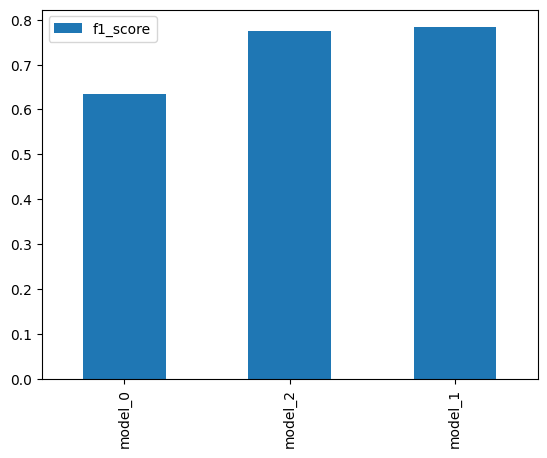

In [ ]:
all_model_fscore = pd.DataFrame({
    "model_0":model_0_result["f1_score"],
    "model_1":model_1_result["f1_score"],
    "model_2":model_2_result["f1_score"],
},index= ["f1_score"]).T.sort_values(by=["f1_score"],ascending=True).plot(kind = "bar")

In [ ]:
def charecter_split(text):
  return " ".join(list(text))

In [ ]:
charecter_train_text = [charecter_split(i) for i in train_text]
charecter_test_text = [charecter_split(i) for i in test_text]
charecter_val_text = [charecter_split(i) for i in val_text]

In [ ]:
charecter_train_text[:5]

['i g e   s e n s i t i z a t i o n   t o   a s p e r g i l l u s   f u m i g a t u s   a n d   a   p o s i t i v e   s p u t u m   f u n g a l   c u l t u r e   r e s u l t   a r e   c o m m o n   i n   p a t i e n t s   w i t h   r e f r a c t o r y   a s t h m a   .',
 'i t   i s   n o t   c l e a r   w h e t h e r   t h e s e   p a t i e n t s   w o u l d   b e n e f i t   f r o m   a n t i f u n g a l   t r e a t m e n t   .',
 'w e   s o u g h t   t o   d e t e r m i n e   w h e t h e r   a   @ - m o n t h   c o u r s e   o f   v o r i c o n a z o l e   i m p r o v e d   a s t h m a - r e l a t e d   o u t c o m e s   i n   p a t i e n t s   w i t h   a s t h m a   w h o   a r e   i g e   s e n s i t i z e d   t o   a   f u m i g a t u s   .',
 'a s t h m a t i c   p a t i e n t s   w h o   w e r e   i g e   s e n s i t i z e d   t o   a   f u m i g a t u s   w i t h   a   h i s t o r y   o f   a t   l e a s t   @   s e v e r e   e x a c e r b a t i o n s   i n   t h e   p r e v 

In [ ]:
len_of_charecter = [len(i.split()) for i in charecter_train_text]

In [ ]:
for i in charecter_train_text[:2]:
  print(len(i.split()))

115
68


(array([9.8570e+03, 1.5233e+04, 4.2160e+03, 7.2200e+02, 1.3500e+02,
        3.4000e+01, 9.0000e+00, 5.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  2. ,  89.9, 177.8, 265.7, 353.6, 441.5, 529.4, 617.3, 705.2,
        793.1, 881. ]),
 <BarContainer object of 10 artists>)

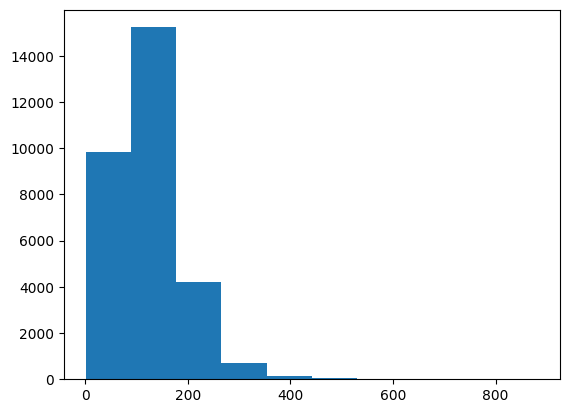

In [ ]:
plt.hist(len_of_charecter)

In [ ]:
np.percentile(len_of_charecter,95)

240.0

In [ ]:
import string
alphabet = string.ascii_lowercase+string.punctuation+string.digits
alphabet,len(alphabet)

('abcdefghijklmnopqrstuvwxyz!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~0123456789', 68)

In [ ]:
char_text_vectorizer = TextVectorization(max_tokens = len(alphabet) + 2, #[UNK], " "
                                         output_sequence_length = 240
                                         )

In [ ]:
char_text_vectorizer.adapt(charecter_train_text)

In [ ]:
char_text_vectorizer.get_vocabulary()[:10]

['', '[UNK]', 'e', 't', 'i', 'a', 'n', 'o', 'r', 's']

In [ ]:
len(string.ascii_lowercase)

26

In [ ]:
char_embed_layer = Embedding(input_dim = 28,
                             output_dim = 26
                             )

In [ ]:
input = tf.keras.layers.Input(shape = [1,],dtype = "string")
x = char_text_vectorizer(input)
x = char_embed_layer(x)
x = tf.keras.layers.Conv1D(64,3,activation = "relu")(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
output = tf.keras.layers.Dense(5,activation = "softmax")(x)

char_model_1 = tf.keras.Model(input,output)
char_model_1.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
char_his_1 = char_model_1.fit(np.array(charecter_train_text),train_one_hot_label,
                    epochs = 5,
                    steps_per_epoch = int(len(train_dataset)*0.2),
                    validation_data = (np.array(charecter_train_text),train_one_hot_label),
                    validation_steps = int(len(val_dataset)*0.2)
                    )

Epoch 1/5
189/189 [==============================] - 23s 109ms/step - loss: 1.3972 - accuracy: 0.4461 - val_loss: 1.2496 - val_accuracy: 0.4929
Epoch 2/5
189/189 [==============================] - 18s 97ms/step - loss: 1.1282 - accuracy: 0.5431 - val_loss: 1.0491 - val_accuracy: 0.5791
Epoch 3/5
189/189 [==============================] - 18s 94ms/step - loss: 1.0156 - accuracy: 0.5962 - val_loss: 0.9796 - val_accuracy: 0.6166
Epoch 4/5
189/189 [==============================] - 17s 88ms/step - loss: 0.9660 - accuracy: 0.6188 - val_loss: 0.9467 - val_accuracy: 0.6291
Epoch 5/5
189/189 [==============================] - 16s 84ms/step - loss: 0.9337 - accuracy: 0.6326 - val_loss: 0.9141 - val_accuracy: 0.6445


In [ ]:
y_pred_char_1 = pred(charecter_val_text,char_model_1)

942/942 [==============================] - 14s 14ms/step


In [ ]:
char_model_result = evaluation_metrics(val_normal_label,y_pred_1)
char_model_result

{'accuracy': 0.7857308777169404,
 'precision': 0.7911952847441119,
 'recall': 0.7857308777169404,
 'f1_score': 0.7832193630041502}

In [ ]:
input = tf.keras.layers.Input(shape = [1,],dtype = "string")
x = char_text_vectorizer(input)
x = char_embed_layer(x)
x = tf.keras.layers.LSTM(64)(x)
output = tf.keras.layers.Dense(5,activation = "softmax")(x)

char_model_2 = tf.keras.Model(input,output)
char_model_2.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
char_his_2 = char_model_2.fit(np.array(charecter_train_text),train_one_hot_label,
                    epochs = 5,
                    steps_per_epoch = int(len(train_dataset)*0.2),
                    validation_data = (np.array(charecter_train_text),train_one_hot_label),
                    validation_steps = int(len(val_dataset)*0.2)
                    )

Epoch 1/5
189/189 [==============================] - 102s 522ms/step - loss: 1.4720 - accuracy: 0.3335 - val_loss: 1.4654 - val_accuracy: 0.3328
Epoch 2/5
189/189 [==============================] - 113s 601ms/step - loss: 1.4659 - accuracy: 0.3327 - val_loss: 1.4638 - val_accuracy: 0.3324
Epoch 3/5
189/189 [==============================] - 114s 603ms/step - loss: 1.4649 - accuracy: 0.3310 - val_loss: 1.4642 - val_accuracy: 0.3331
Epoch 4/5
189/189 [==============================] - 112s 596ms/step - loss: 1.4646 - accuracy: 0.3346 - val_loss: 1.4659 - val_accuracy: 0.3318
Epoch 5/5
189/189 [==============================] - 114s 603ms/step - loss: 1.4641 - accuracy: 0.3333 - val_loss: 1.4650 - val_accuracy: 0.3298


In [ ]:
y_pred_2 = pred(val_text,char_model_2)

942/942 [==============================] - 50s 52ms/step


In [ ]:
model_2_result = evaluation_metrics(val_normal_label,y_pred_2)
model_2_result

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.32842210054753607,
 'precision': 0.1078610761280559,
 'recall': 0.32842210054753607,
 'f1_score': 0.16238976464423285}

In [ ]:
token_input = tf.keras.layers.Input(shape=[1,],dtype = "string")
x = text_vectorizer(token_input)
x = embed_layer(x)
x = tf.keras.layers.Conv1D(64,3,activation = "relu")(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
token_output = tf.keras.layers.Dense(128,activation = "relu")(x)
token_model = tf.keras.Model(token_input,token_output)


char_input = tf.keras.layers.Input(shape=[1,],dtype = "string")
x = char_text_vectorizer(char_input)
x = char_embed_layer(x)
x = tf.keras.layers.Conv1D(64,3,activation = "relu")(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
char_output = tf.keras.layers.Dense(128,activation = "relu")(x)
char_model = tf.keras.Model(char_input,char_output)

concate = tf.keras.layers.Concatenate()([token_model.output,
                                         char_model.output
                                         ])
drop_1 = tf.keras.layers.Dropout(0.5)(concate)
dense_1 = tf.keras.layers.Dense(128,activation = "relu")(drop_1)
drop_2 = tf.keras.layers.Dropout(0.5)(dense_1)

output = tf.keras.layers.Dense(5,activation = "softmax")(drop_2)

big_model_1 = tf.keras.Model(inputs=[token_model.input,
                                     char_model.input
                                     ],
                             outputs = output
                             )

In [ ]:
big_model_1.summary()

Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 input_20 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 text_vectorization_2 (Text  (None, 55)                   0         ['input_19[0][0]']            
 Vectorization)                                                                                   
                                                                                                  
 text_vectorization_3 (Text  (None, 240)                  0         ['input_20[0][0]']     

In [ ]:
from keras.utils import plot_model
plot_model(big_model_1,show_shapes = True)

In [ ]:
def big_dataset_maker(text,char_text,label):
  all_text = tf.data.Dataset.from_tensor_slices((text,char_text))
  all_label = tf.data.Dataset.from_tensor_slices(label)
  big_dataset = tf.data.Dataset.zip((all_text,all_label)).batch(32).prefetch(tf.data.AUTOTUNE)
  return big_dataset

In [ ]:
big_train_dataset = big_dataset_maker(train_text,charecter_train_text,train_one_hot_label)

In [ ]:
big_test_dataset = big_dataset_maker(test_text,charecter_test_text,test_one_hot_label)
big_val_dataset = big_dataset_maker(val_text,charecter_val_text,val_one_hot_label)

In [ ]:
big_train_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
big_model_1.compile(loss = "categorical_crossentropy",
                    optimizer = "adam",
                    metrics = ["accuracy"]
                    )

big_his_1 = big_model_1.fit(big_train_dataset,
                            epochs = 5,
                            steps_per_epoch = int(len(big_train_dataset)*0.2),
                            validation_data = big_val_dataset,
                            validation_steps = int(len(big_val_dataset)*0.2)
                            )

Epoch 1/5
1125/1125 [==============================] - 31s 25ms/step - loss: 0.6556 - accuracy: 0.7596 - val_loss: 0.5905 - val_accuracy: 0.7794
Epoch 2/5
1125/1125 [==============================] - 13s 12ms/step - loss: 0.6069 - accuracy: 0.7811 - val_loss: 0.5308 - val_accuracy: 0.8024
Epoch 3/5
1125/1125 [==============================] - 14s 12ms/step - loss: 0.5865 - accuracy: 0.7909 - val_loss: 0.5050 - val_accuracy: 0.8090
Epoch 4/5
1125/1125 [==============================] - 13s 11ms/step - loss: 0.5496 - accuracy: 0.8033 - val_loss: 0.5003 - val_accuracy: 0.8118
Epoch 5/5
1125/1125 [==============================] - 12s 11ms/step - loss: 0.5433 - accuracy: 0.8051 - val_loss: 0.5050 - val_accuracy: 0.8067


In [ ]:
big_y_pred_1 = pred(big_val_dataset,big_model_1)

942/942 [==============================] - 4s 4ms/step


In [ ]:
big_model_1_result = evaluation_metrics(val_normal_label,big_y_pred_1)
big_model_1_result

{'accuracy': 0.8114816658370665,
 'precision': 0.8120629879476642,
 'recall': 0.8114816658370665,
 'f1_score': 0.8074034708602312}

In [ ]:
train_line_number_ = train_dataframe["line_number"].to_numpy()
test_line_number_ = test_dataframe["line_number"].to_numpy()
val_line_number_ = val_dataframe["line_number"].to_numpy()

(array([4.5000e+04, 4.4941e+04, 4.2383e+04, 2.9914e+04, 1.2840e+04,
        3.8000e+03, 9.1000e+02, 2.0000e+02, 4.3000e+01, 9.0000e+00]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

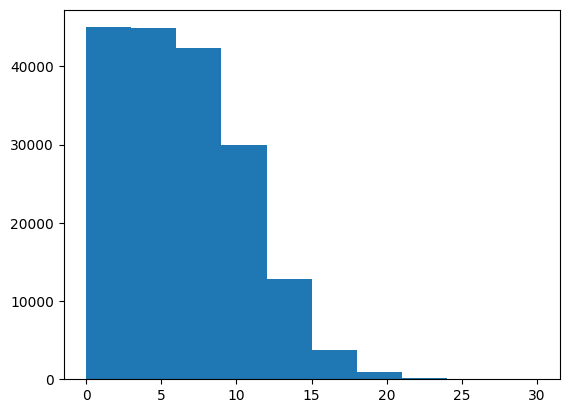

In [ ]:
plt.hist(train_line_number)

In [ ]:
train_dataframe["line_number"].value_counts()

line_number
0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: count, dtype: int64

In [ ]:
train_line_number = tf.one_hot(indices = train_line_number_,depth = 15)
test_line_number = tf.one_hot(indices = test_line_number_,depth = 15)
val_line_number = tf.one_hot(indices = val_line_number_,depth = 15)

In [ ]:
train_line_number[:10]

<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [ ]:
train_total_line = train_dataframe["total_line"].to_numpy()
test_total_line = test_dataframe["total_line"].to_numpy()
val_total_line = val_dataframe["total_line"].to_numpy()

In [ ]:
train_total_line_number = tf.one_hot(train_total_line,depth = 20)
test_total_line_number = tf.one_hot(test_total_line,depth = 20)
val_total_line_number = tf.one_hot(val_total_line,depth = 20)

In [ ]:
train_total_line_number[-1]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [ ]:
def new_big_dataset_maker(text,char_text,label,line_number,total_line):
  all_text = tf.data.Dataset.from_tensor_slices((text,char_text,line_number,total_line))
  all_label = tf.data.Dataset.from_tensor_slices(label)
  big_dataset = tf.data.Dataset.zip((all_text,all_label)).batch(32).prefetch(tf.data.AUTOTUNE)
  return big_dataset

In [ ]:
new_big_train_dataset = new_big_dataset_maker(train_text,charecter_train_text,train_one_hot_label,train_line_number,train_total_line_number)
new_big_test_dataset = new_big_dataset_maker(test_text,charecter_test_text,test_one_hot_label,test_line_number,test_total_line_number)
new_big_val_dataset = new_big_dataset_maker(val_text,charecter_val_text,val_one_hot_label,val_line_number,val_total_line_number)

In [ ]:
new_big_train_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
token_input = tf.keras.layers.Input(shape=[1,],dtype = "string")
x = text_vectorizer(token_input)
x = embed_layer(x)
x = tf.keras.layers.Conv1D(64,3,activation = "relu")(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
token_output = tf.keras.layers.Dense(128,activation = "relu")(x)
token_model = tf.keras.Model(token_input,token_output)


char_input = tf.keras.layers.Input(shape=[1,],dtype = "string")
x = char_text_vectorizer(char_input)
x = char_embed_layer(x)
x = tf.keras.layers.Conv1D(64,3,activation = "relu")(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
char_output = tf.keras.layers.Dense(128,activation = "relu")(x)
char_model = tf.keras.Model(char_input,char_output)

line_input = tf.keras.layers.Input(shape = [15,],dtype = "float")
line_output = tf.keras.layers.Dense(128,activation = "relu")(line_input)
line_model = tf.keras.Model(line_input,line_output)

total_line_input = tf.keras.layers.Input(shape = [20,],dtype = "float")
total_line_output = tf.keras.layers.Dense(128,activation = "relu")(total_line_input)
total_line_model = tf.keras.Model(total_line_input,total_line_output)


concate = tf.keras.layers.Concatenate()([token_model.output,
                                         char_model.output,
                                         line_model.output,
                                         total_line_model.output
                                         ])

dense_1 = tf.keras.layers.Dense(128,activation = "relu")(concate)
drop_2 = tf.keras.layers.Dropout(0.2)(dense_1)

output = tf.keras.layers.Dense(5,activation = "softmax")(drop_2)

big_model_2 = tf.keras.Model(inputs=[token_model.input,
                                     char_model.input,
                                     line_model.input,
                                     total_line_model.input
                                     ],
                             outputs = output
                             )

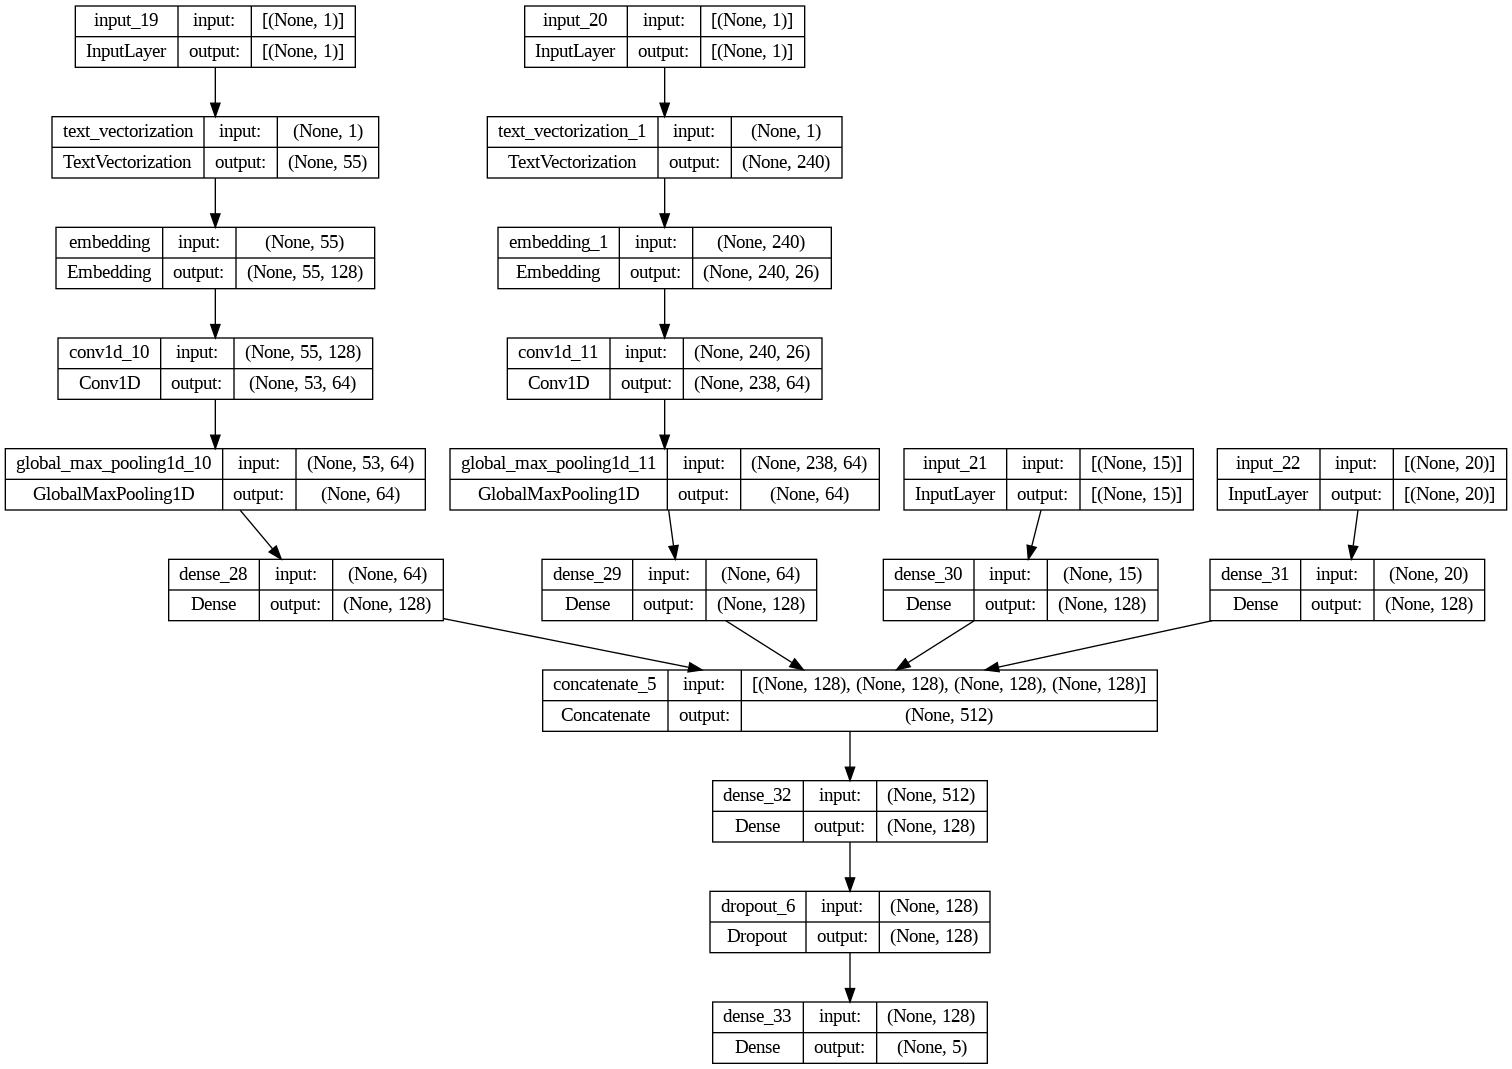

In [ ]:
plot_model(big_model_2,show_shapes = True)

In [ ]:
big_model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2),
                    optimizer = "adam",
                    metrics = ["accuracy"]
                    )

big_his_2 = big_model_2.fit(new_big_train_dataset,
                            epochs = 5,
                            steps_per_epoch = int(len(new_big_train_dataset)*0.2),
                            validation_data = new_big_val_dataset,
                            validation_steps = int(len(new_big_val_dataset)*0.2)
                            )

Epoch 1/5
1125/1125 [==============================] - 31s 25ms/step - loss: 0.8110 - accuracy: 0.9246 - val_loss: 0.9654 - val_accuracy: 0.8203
Epoch 2/5
1125/1125 [==============================] - 13s 12ms/step - loss: 0.8763 - accuracy: 0.8674 - val_loss: 0.8687 - val_accuracy: 0.8703
Epoch 3/5
1125/1125 [==============================] - 14s 12ms/step - loss: 0.8604 - accuracy: 0.8777 - val_loss: 0.8593 - val_accuracy: 0.8760
Epoch 4/5
1125/1125 [==============================] - 13s 12ms/step - loss: 0.8463 - accuracy: 0.8851 - val_loss: 0.8482 - val_accuracy: 0.8808
Epoch 5/5
1125/1125 [==============================] - 13s 11ms/step - loss: 0.8467 - accuracy: 0.8863 - val_loss: 0.8523 - val_accuracy: 0.8748


In [ ]:
big_pred_2 = pred(new_big_val_dataset,big_model_2)
big_pred_2

942/942 [==============================] - 6s 5ms/step


array([0, 2, 2, ..., 4, 4, 1])

In [ ]:
big_model_2_result = evaluation_metrics(val_normal_label,big_pred_2)
big_model_2_result

{'accuracy': 0.8777501244400199,
 'precision': 0.8775339457685069,
 'recall': 0.8777501244400199,
 'f1_score': 0.8749296662387052}